# POLS 203: Social Statistics
## Eighth Discussion Session
December 29, 2020

## Barplots in ggplot2

### Vertical

In the Human Development Index District (HDI-D) 2018, all the districts of Istanbul, Ankara and Izmir provinces were included, in addition to the most populuous 150 districts of other provinces in Turkey. The dataset includes following indices:
* gov_trans : Governance and Transparency Indicators
* social_inclusion : Social Inclusion Indicator
* economic_status : Economic Status Indicators
* education : Education Indicators
* health : Health Indicators
* social_life : Social Life Indicators
* munenvperf_trans : Municipality Environmental Performance and Transportation Index

First, we need to load required libraries. Then, read the dataset.

In [9]:
library(tidyverse) #you don't need this one
library(ggplot2) #ggplot2 library
library(ggthemes) #themes for ggplot2
library(grid) # grid and gridExtra to draw gglot2 graphs together
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [3]:
setwd("C:/Users/musta/Desktop/datas")
dt <- read.csv("hdi_district.csv", header = T, sep = ";")
head(dt)

province,district,gov_trans,social_inclusion,economic_status,education,health,social_life,munenvperf_trans,hdi_d
İstanbul,Beşiktaş,0.944,0.685,0.867,0.981,0.732,0.900,0.775,0.864
İstanbul,Kadiköy,0.950,0.610,0.745,0.955,0.896,0.888,0.650,0.846
Ankara,Çankaya,0.962,0.355,0.634,0.965,0.745,0.775,0.700,0.766
İstanbul,Şişli,0.957,0.430,0.616,0.753,0.796,0.675,0.950,0.736
Bursa,Nilüfer,0.832,0.453,0.610,0.820,0.735,0.575,0.725,0.698
Antalya,Muratpaşa,0.913,0.377,0.602,0.765,0.800,0.575,0.550,0.692


Do not change this code block, I will use tidyverse package but you do not need to use it to filter data.

In [4]:
#Manipulating the data

dist_filtered <- dt %>%
  filter(province == "İstanbul")

dt <- dt %>%
  mutate(colgr = ifelse(province == "İstanbul", "İstanbul", "Others"))

In ggplot2, you can save your plots. First, create a barplot for *hdi_d* values of the districts of Istanbul and save it to a variable called **hdi_v_1*.

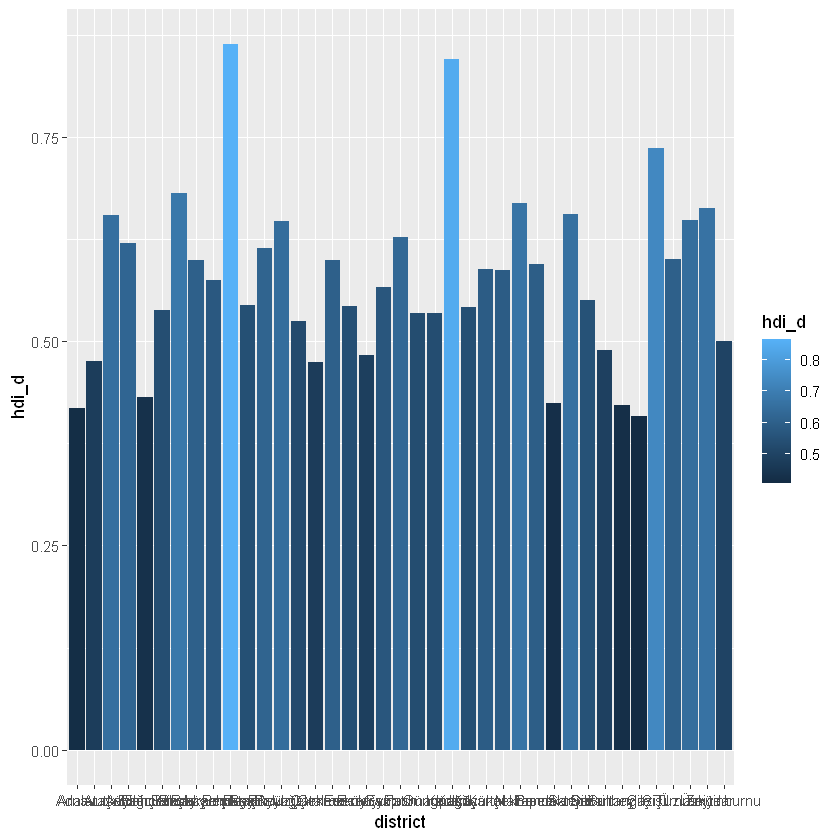

In [5]:
hdi_v_1 <- ggplot(data = dist_filtered, 
                aes(x = district, y = hdi_d, fill = hdi_d))+
  geom_bar(stat = "identity") # geom_bar: Use it to create barplots

hdi_v_1

Well, it is painful to look at this graph. Let's reorder the districts an  save it to **hdi_v_2**.

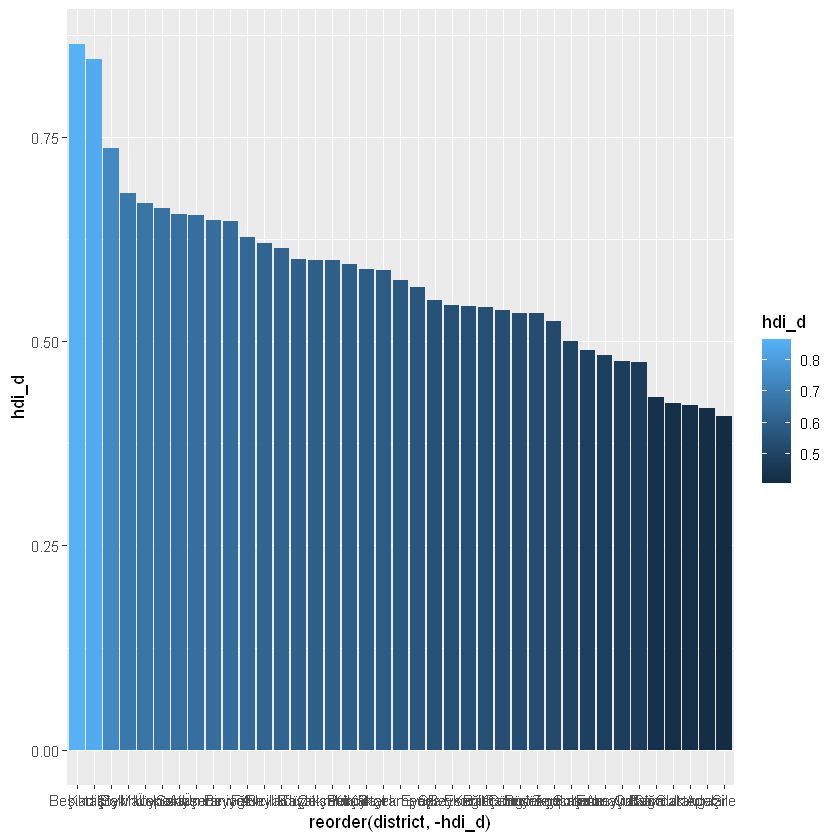

In [7]:
hdi_v_2 <- ggplot(data = dist_filtered, 
                aes(reorder(district, -hdi_d), y = hdi_d, fill = hdi_d))+
  geom_bar(stat = "identity")

hdi_v_2

**NOT IMPORTANT BUT USEFUL**: Let's show them together:

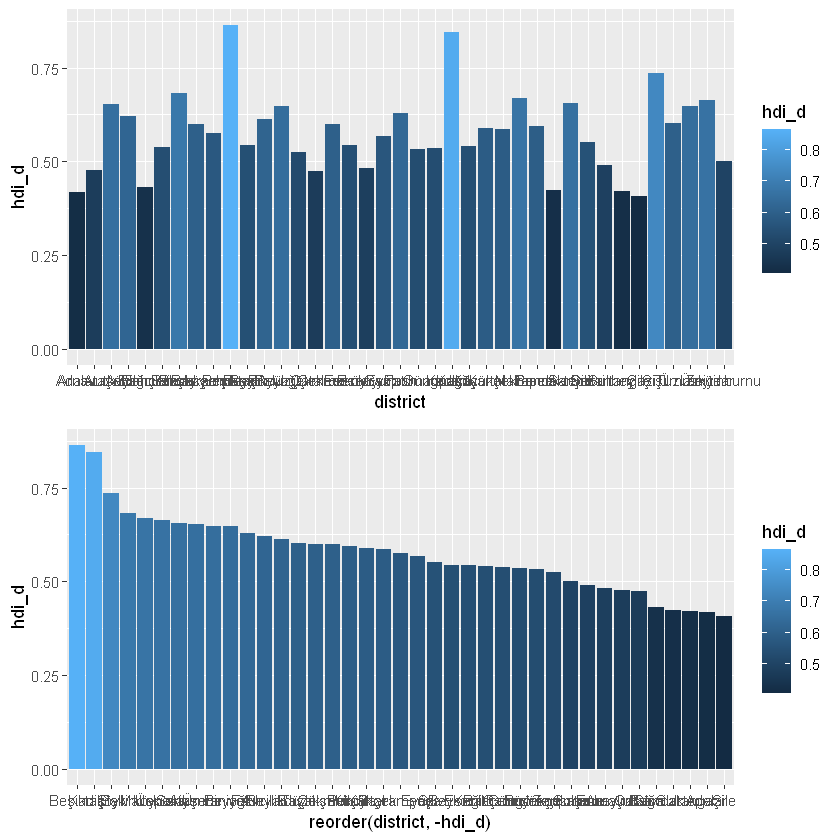

In [10]:
grid.arrange(hdi_v_1, hdi_v_2, nrow=2)

Graph still looks bad. Here, we will totally transform it step by step. First, we will change the colors of the graph from green to red. Then, create a legend for the graph with the mean, median, maximum, and minimum values for **hdi_d** variable. For this, we will use `scale_fil_gradient` function. Arguments of `scale_fill_gradient`:
* low, high, mid: The colors of the gradient
* breaks: The breaks that we will show in legend
* labels: The labels of the breaks
* limits: To which color max and min will be assigned

We will need min, max, and median values of **hdi_d**.

In [16]:
min(dist_filtered$hdi_d)
median(dist_filtered$hdi_d)
(min(dist_filtered$hdi_d)+max(dist_filtered$hdi_d))/2
max(dist_filtered$hdi_d)

[1] 0.408

[1] 0.575

[1] 0.636

[1] 0.864

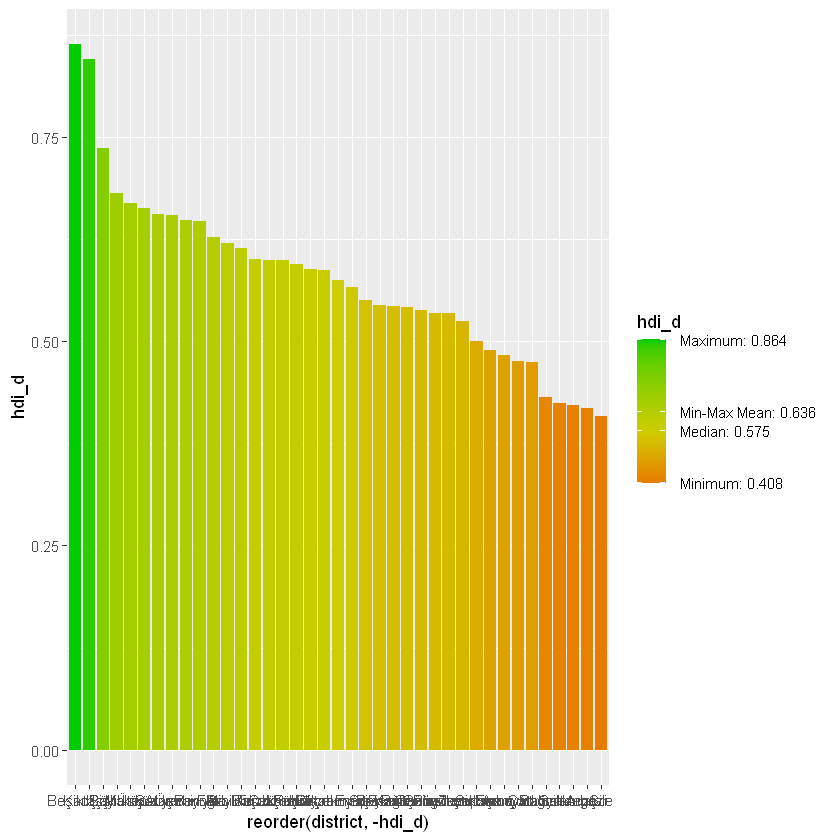

In [18]:
hdi_v <- ggplot(data = dist_filtered, 
                aes(reorder(district, -hdi_d), y = hdi_d, fill = hdi_d))+
  geom_bar(stat = "identity")+
  scale_fill_gradient2(low = "red2", 
                       high = "green3",
                       mid = "yellow3",
                       midpoint = median(dist_filtered$hdi_d),
                       breaks=c(min(dist_filtered$hdi_d),
                                median(dist_filtered$hdi_d),
                                (min(dist_filtered$hdi_d)+max(dist_filtered$hdi_d))/2,
                                max(dist_filtered$hdi_d)),
                       labels=c("Minimum: 0.408",
                                "Median: 0.575", 
                                "Min-Max Mean: 0.636", 
                                "Maximum: 0.864"),
                       limits=c(min(dist_filtered$hdi_d),max(dist_filtered$hdi_d)))
hdi_v

Well, we should still fix the names of districts. We will do something cheeky: Put them into the bars.

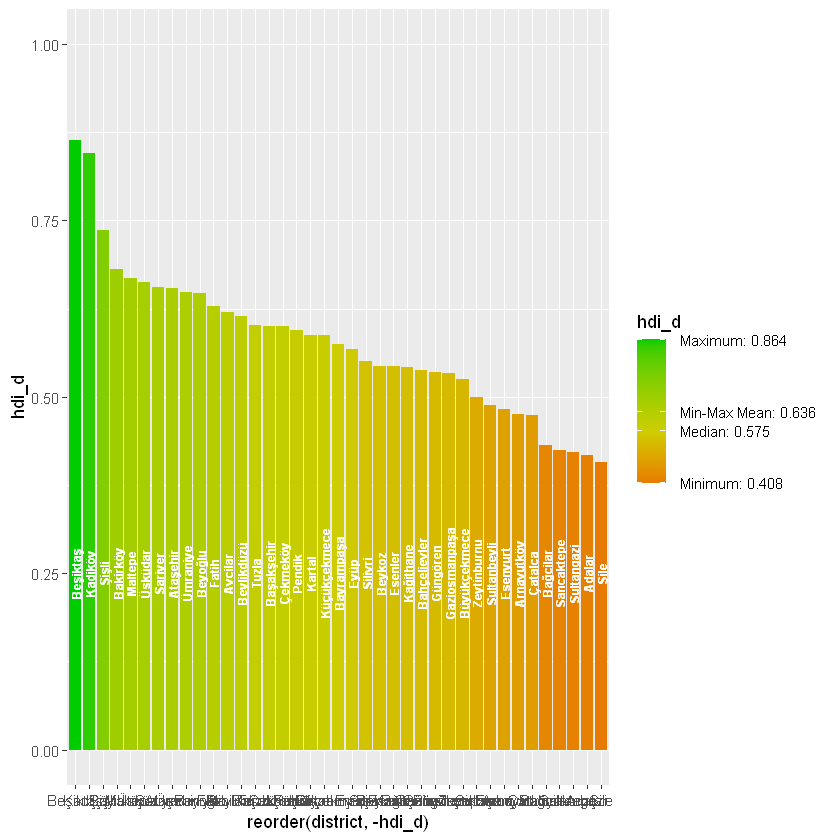

In [19]:
hdi_v <- hdi_v + geom_text(aes(label=district), 
                           color="white", size=2.5,
                           position = position_fill(vjust=0.25),
                           angle = 90,
                           fontface ="bold")
hdi_v

Then, add title, subtitle, a caption, and new names for X and Y axes.

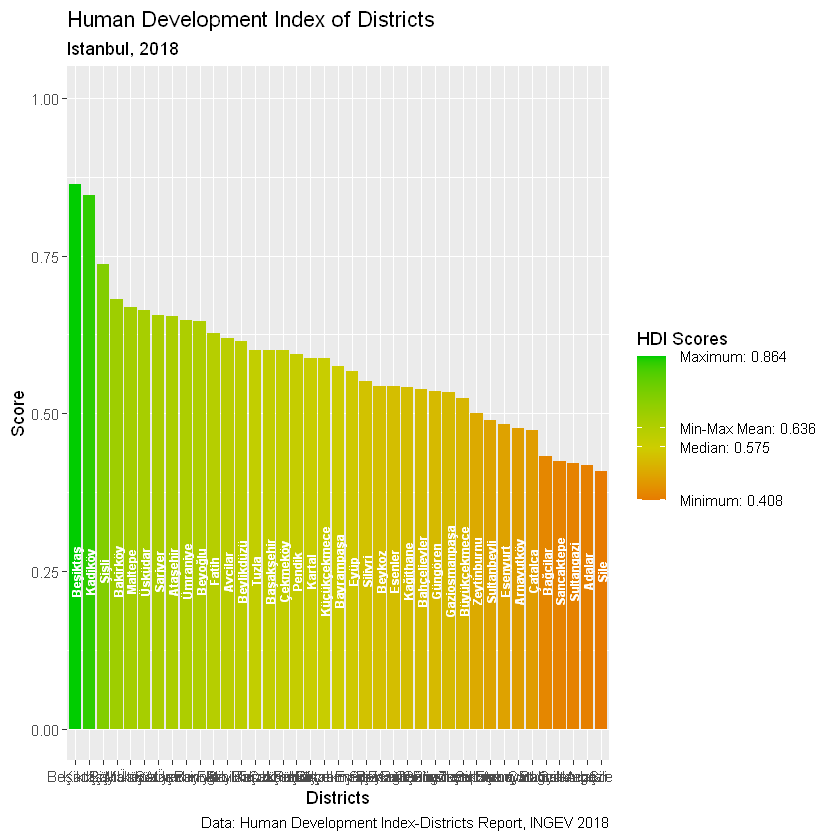

In [20]:
hdi_v <- hdi_v + labs(x="Districts",
                      y="Score",
                      title = "Human Development Index of Districts",
                      subtitle = "Istanbul, 2018",
                      caption = "Data: Human Development Index-Districts Report, INGEV 2018",
                      fill='HDI Scores')
hdi_v

Finally, we can use `theme()`function to give final touches to our graph.

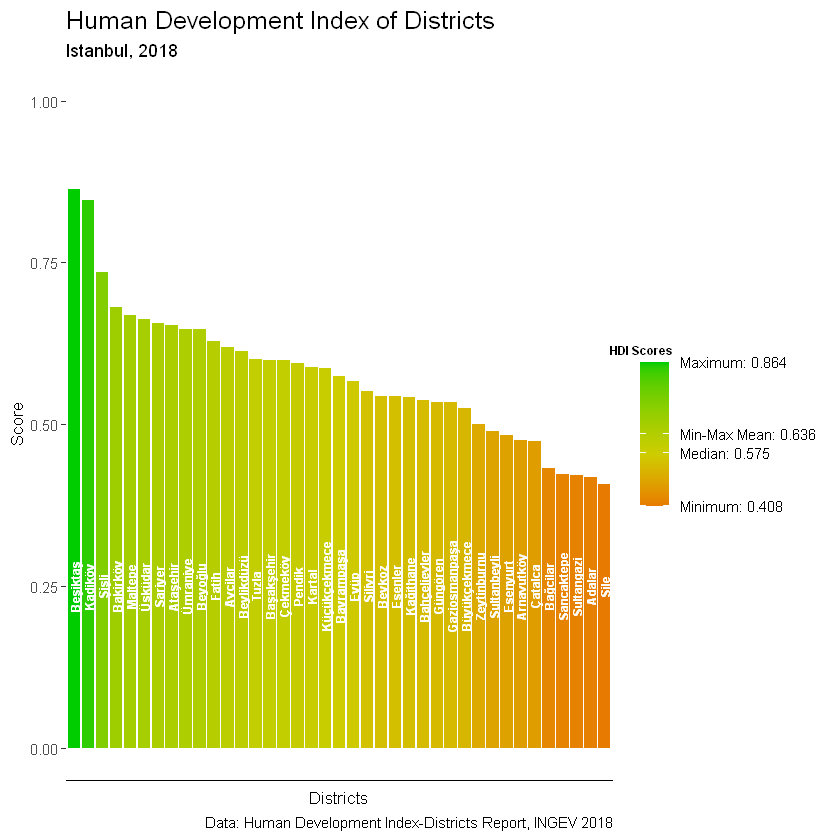

In [21]:
hdi_v <- hdi_v + theme(plot.title = element_text(size = 15, color = "black"),
                        axis.line.x = element_line(color = "black", size = 0.5),
                        axis.text.x = element_blank(),
                        axis.title.x = element_text(color = "black", size = 10), 
                        axis.ticks.x = element_blank(),
                        axis.title.y = element_text(color = "black", size = 10),
                        legend.title = element_text(size = 7, face = "bold", hjust = -0.25, vjust = 0.5),
                        panel.background = element_blank())
hdi_v

Not necessary, but we can delete the whitespace between X-axis label and the plot.

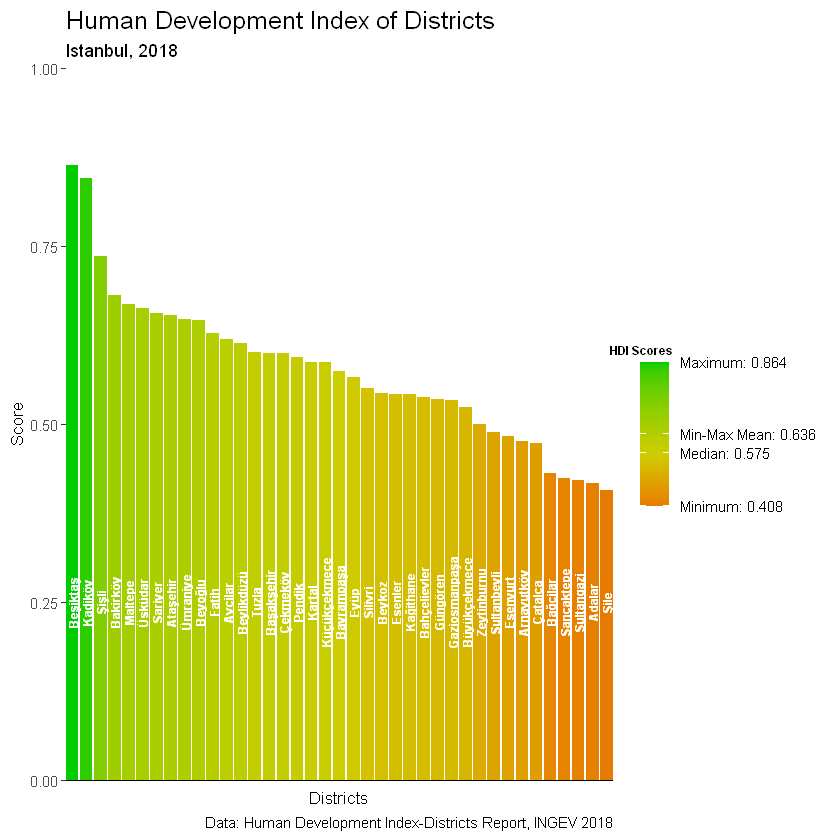

In [22]:
hdi_v <- hdi_v + coord_cartesian(expand = FALSE )
hdi_v

### Horizontal

What if we wanted to show it horizontally? Below is the code for it.

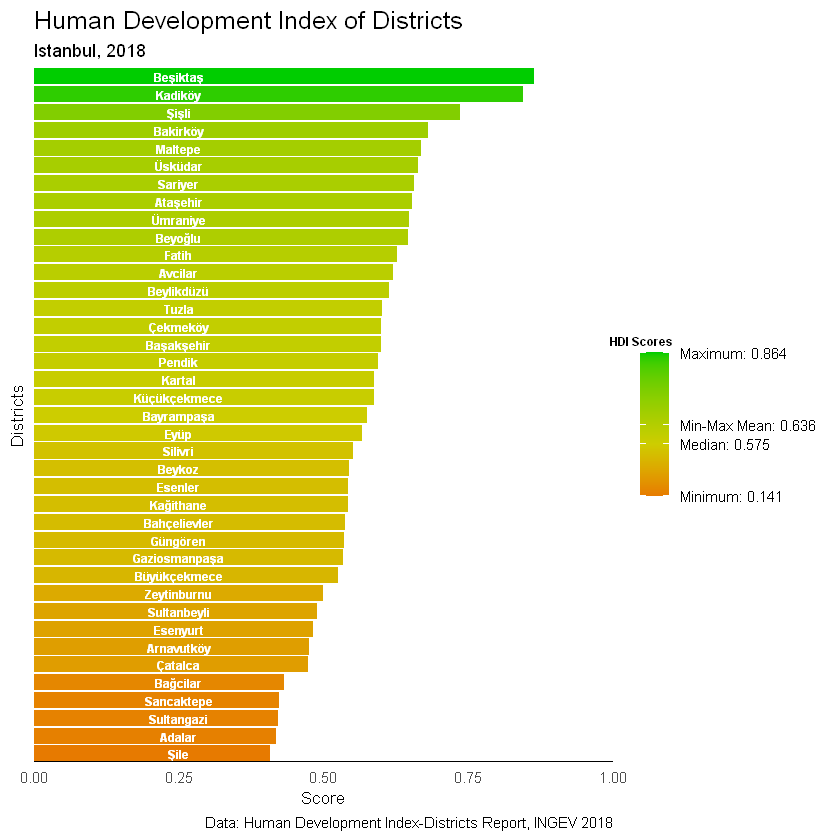

In [24]:
hdi_h <- ggplot(data = dist_filtered, 
                aes(reorder(district, hdi_d), y = hdi_d, fill = hdi_d))+
  geom_bar(stat = "identity")+
  scale_fill_gradient2(low = "red2", 
                       high = "green3",
                       mid = "yellow3",
                       midpoint = median(dist_filtered$hdi_d),
                       breaks=c(min(dist_filtered$hdi_d),
                                median(dist_filtered$hdi_d),
                                (min(dist_filtered$hdi_d)+max(dist_filtered$hdi_d))/2,
                                max(dist_filtered$hdi_d)),
                       labels=c("Minimum: 0.141",
                                "Median: 0.575", 
                                "Min-Max Mean: 0.636", 
                                "Maximum: 0.864"),
                       limits=c(min(dist_filtered$hdi_d),max(dist_filtered$hdi_d)))+
  geom_text(aes(label=district), 
            color="white", size=2.5, 
            position = position_fill(vjust=0.25), 
            fontface ="bold")+
  labs(x="Districts",
       y="Score",
       title = "Human Development Index of Districts",
       subtitle = "Istanbul, 2018",
       caption = "Data: Human Development Index-Districts Report, INGEV 2018",
       fill='HDI Scores')+
  theme(plot.title = element_text(size = 15, color = "black"),
        axis.line.x = element_line(color = "black", size = 0.5),
        axis.text.y = element_blank(),
        axis.title.x = element_text(color = "black", size = 10), 
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_text(color = "black", size = 10),
        legend.title = element_text(size = 7, face = "bold", hjust = -0.25, vjust = 0.5),
        panel.background = element_blank())+
        coord_flip(expand = FALSE)
hdi_h

Notice the differences: In reordering in `aes(reorder())` function we did not use `-` sign. Also, we needed to change some parameters for X and Y axes. 

## Histograms

Let's create a histogram of *all provinces'* values of **hdi_d** index. Set the bin width to 0.5 and save the graph to **hist_1**

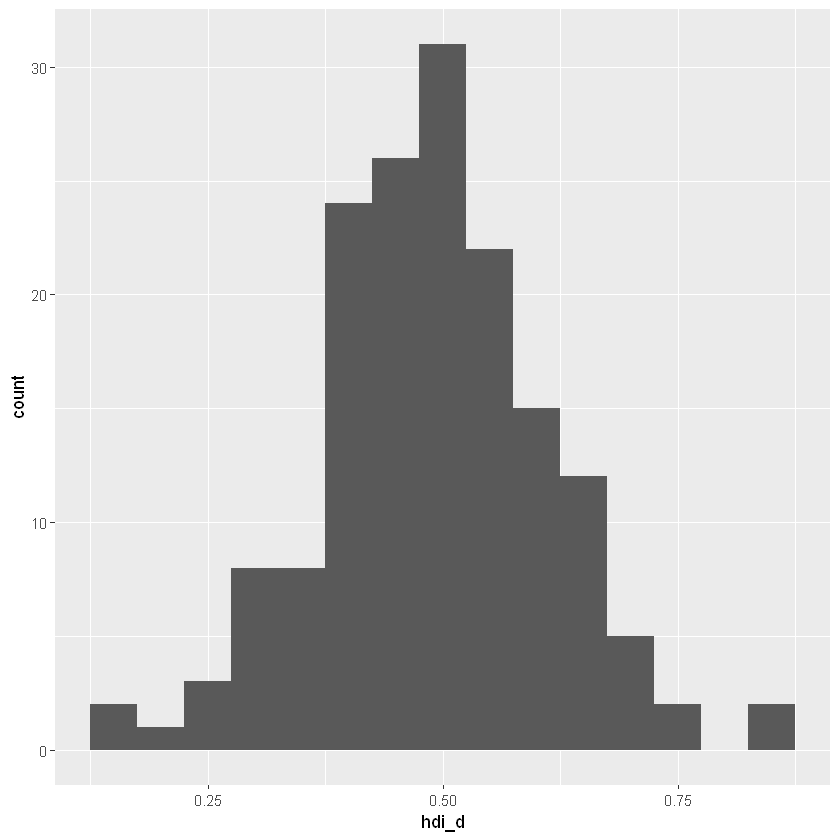

In [25]:
hist_1 <- ggplot(data = dt, mapping = aes(hdi_d))+
  geom_histogram(binwidth = 0.05)
hist_1

Then, we can add some color to it. Save it to **hist_2**. Also, add the mean of **hdi_d** values with a vertical line.

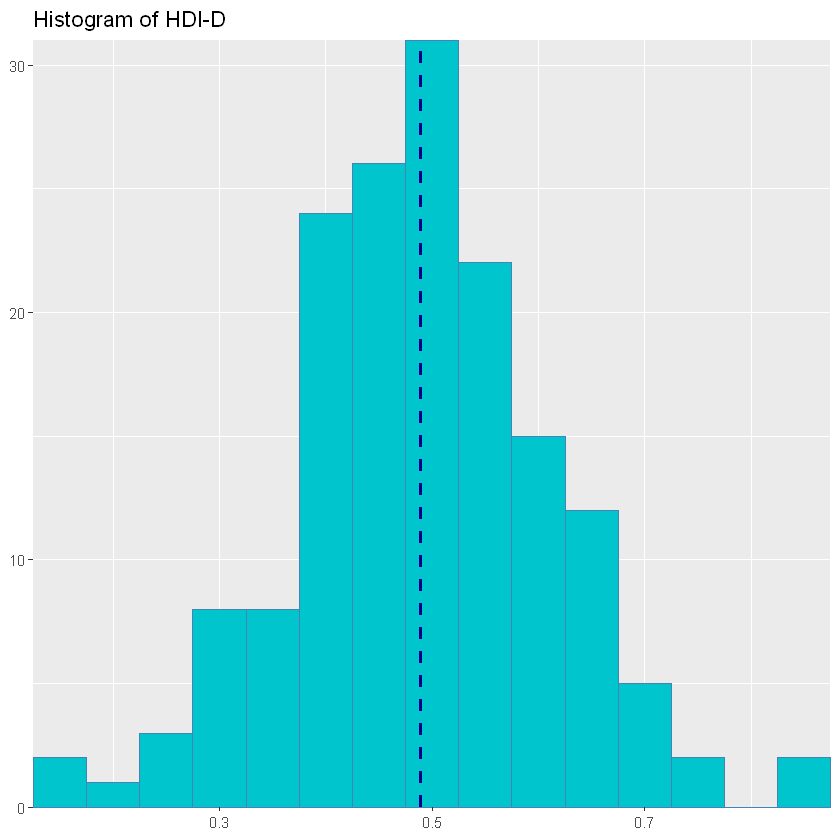

In [27]:
hist_2 <- ggplot(data = dt, mapping = aes(hdi_d))+
  geom_histogram(binwidth = 0.05, color = "steelblue", fill = "turquoise3")+
  geom_vline(aes(xintercept=mean(hdi_d)),
             color="darkblue", linetype="dashed", size=1)+
  ggtitle(label = "Histogram of HDI-D") +
  coord_cartesian(expand = FALSE) +
  theme(axis.title = element_blank())
hist_2

Let's try something unnecessary but different. Similar to **hist_2**, we will create colorful graph using another theme, `theme_economist()`. This is why we loaded `ggthemes` library. Save it to **hist_3**.

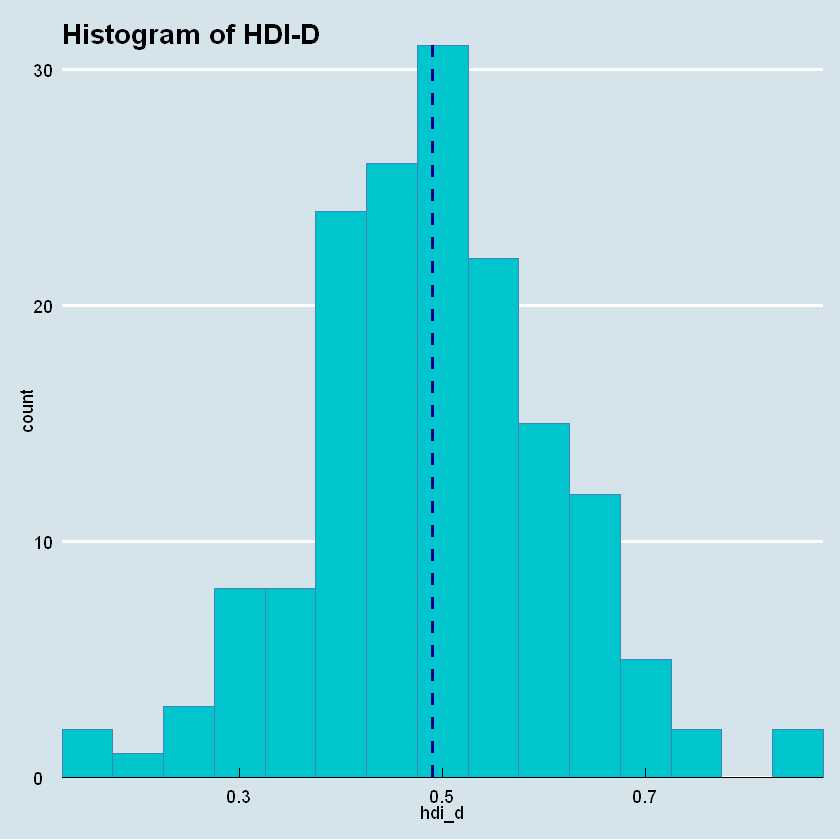

In [33]:
hist_3 <- hist_1 +
  geom_histogram(binwidth = 0.05, color = "steelblue", fill = "turquoise3")+
  geom_vline(aes(xintercept=mean(hdi_d)),
             color="darkblue", linetype="dashed", size=1)+
  ggtitle(label = "Histogram of HDI-D") +
  theme_economist()+
  coord_cartesian(expand = FALSE)
hist_3

## Scatter Plot

Now, we will show the correlation between education and human development with a scatter diagram.

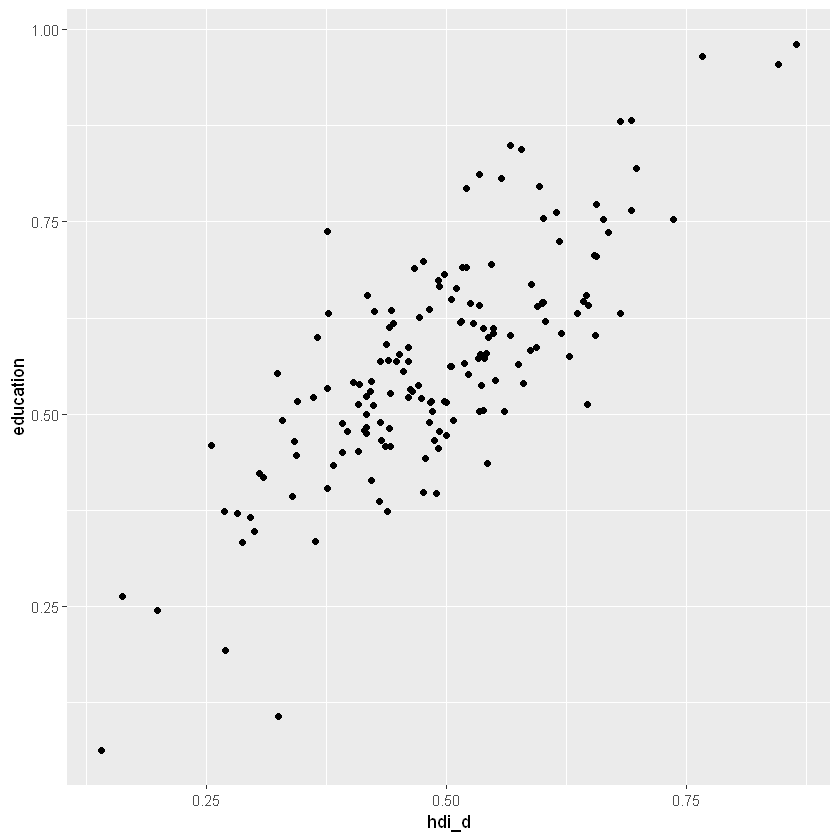

In [39]:
g1 <- ggplot(data=dt, aes(y=education, x=hdi_d))+
  geom_point()
g1

 Color the dots using **colgr** column.

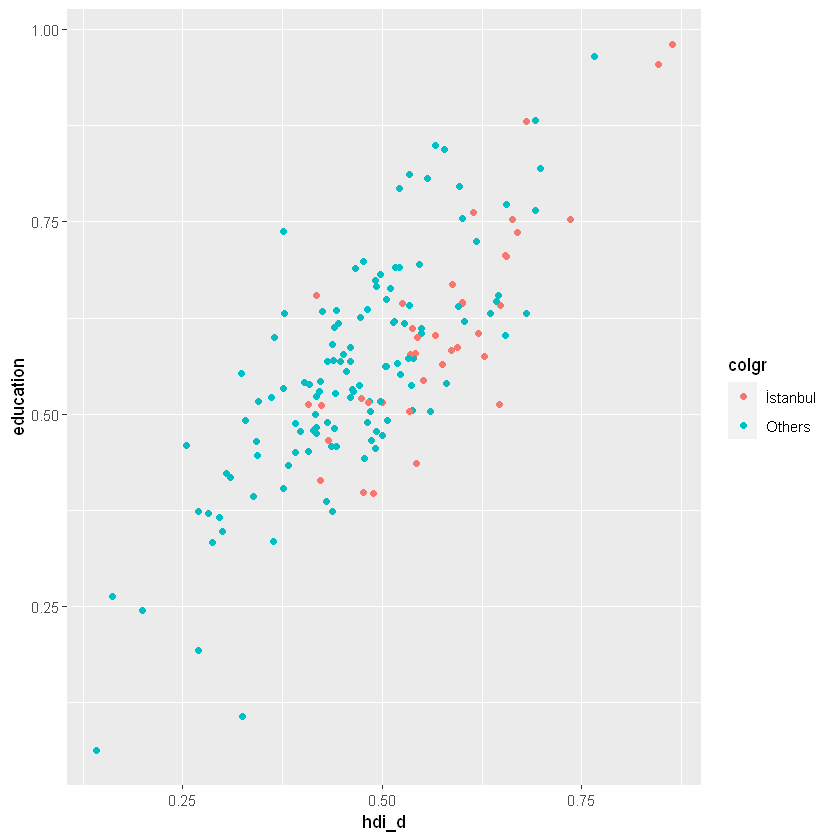

In [40]:
g1 <- ggplot(data=dt, aes(y=education, x=hdi_d, col=colgr))+
  geom_point()
g1

Now, we will show this correlation with linear regression. This is how we do it.

`geom_smooth()` using formula 'y ~ x'


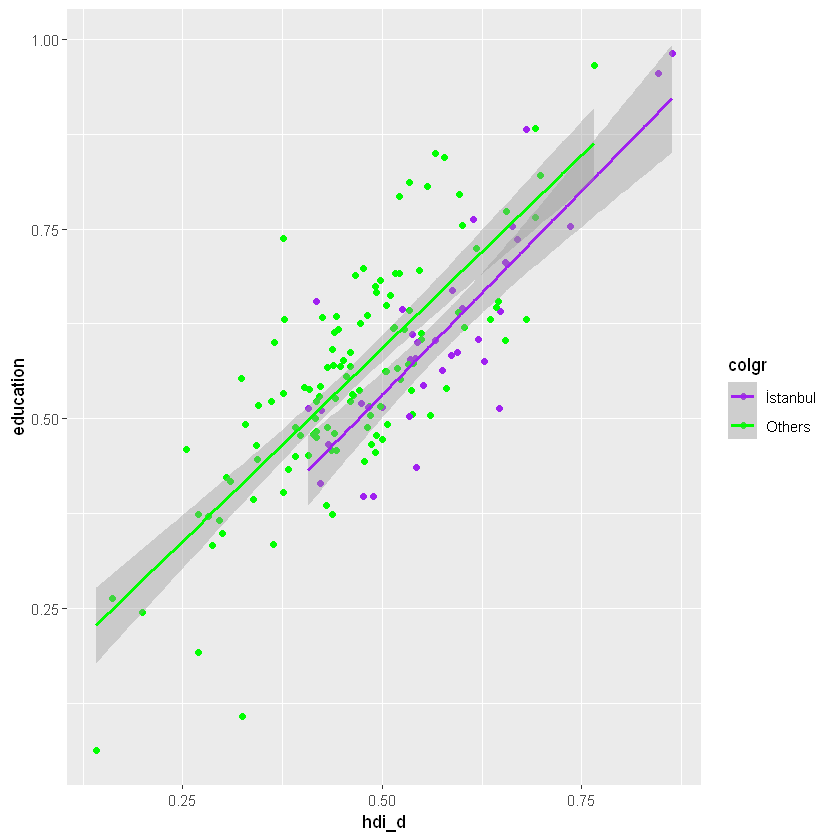

In [42]:
g2<-ggplot(data=dt, aes(y=education, x=hdi_d, col=colgr))+
  geom_point()+
  geom_smooth(method = "glm")+
  scale_color_manual(values = c("purple", "green"))
g2

Finally, add titles, labels, and make some changes aesthetically.

`geom_smooth()` using formula 'y ~ x'


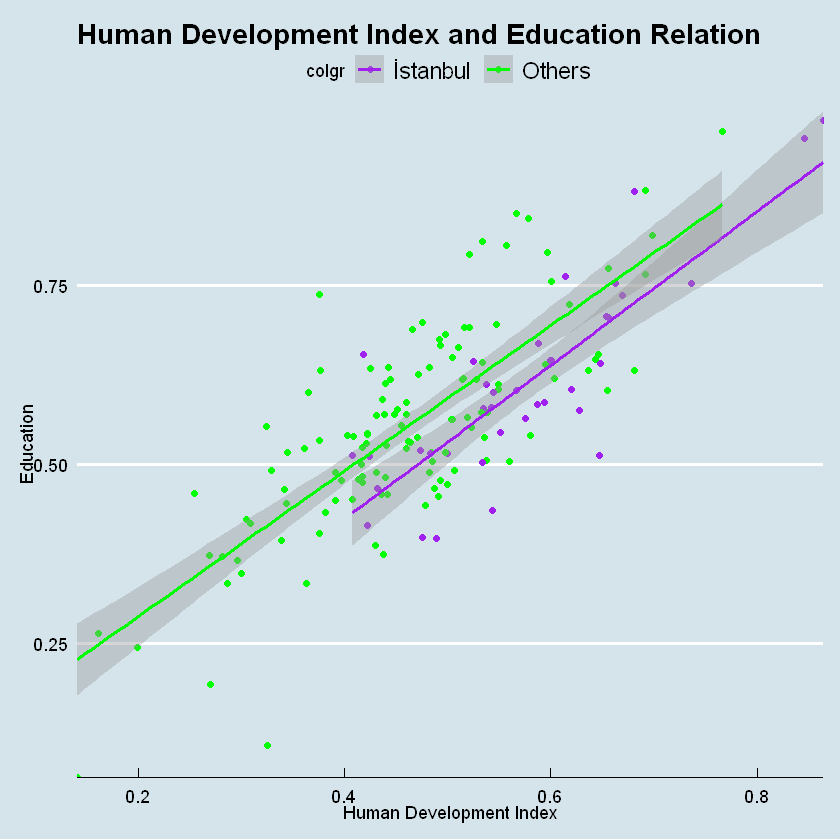

In [47]:
g3 <-ggplot(data=dt, aes(y=education, x=hdi_d, col=colgr))+
  geom_point()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  geom_smooth(method = "glm")+
  scale_color_manual(values = c("purple", "green"))+
  labs(title = "Human Development Index and Education Relation", x = "Human Development Index", y = "Education")+
  coord_cartesian(expand = FALSE)
g3

Try some other themes.